In [1]:
#nn = sys.argv
#carrega o arquivo de parametros
def df_ref_utlima(path, com):
    '''Esta funcao recebe o caminho do arquivo path e o nome do parametor com e retorna o parametro escolhido'''
    '''Parametros com: morse,erro_morse,nome_morse,stacking,erro_stacking,nome_stacking'''
    import sys
    D=[]
    k=[]
    morse=[]
    erro_morse=[]
    nome_morse=[]
    stacking=[]
    erro_stacking=[]
    nome_stacking=[]
    filep = open(path,'r')
    #separa os valores dos parametros e os desvios
    #estoca o valor em uma linha e na proxima linha o desvio deste parametro
    for line in filep:
        line=line.strip()
        if ":morse.D" in line:
            #valor do parametro de Morse e erro
            morse.append(float(line.split(' ')[1])*1000)
            erro_morse.append(float(line.split(' ')[2])*1000)
            nome_morse.append(line.split(':')[0])
            #print(f"{line.split(':')[0]},{float(line.split(' ')[1])*100}, {float(line.split(' ')[2])*100} ")
        elif ":harmonic.k" in line:
            #valor do parametro de empilhamento e erro
            stacking.append(float(line.split(' ')[1])*100)
            erro_stacking.append(float(line.split(' ')[2])*100)
            nome_stacking.append(line.split(':')[0])
            #for i in range(len(nome_stacking)):
            #print(f"{line.split(':')[0]},{float(line.split(' ')[1])*100}, {float(line.split(' ')[2])*100} ")
    if com== "morse":
        return morse

    if com== "erro_morse":
        return erro_morse

    if com== "nome_morse":
        return nome_morse
    
    if com== "stacking":
        return stacking

    if com== "erro_stacking":
        return erro_stacking
            
    if com== "nome_stacking":
        return nome_stacking


In [2]:
def func_df(path, param):
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    '''esta funcao recebe o caminho do aquivo de dados tipo av-std.da
    e retorna um dataframe com morse e o stacking, se param= morse ou empilhamento, 
    respectivamente'''
    a=df_ref_utlima(path, 'morse')
    b=df_ref_utlima(path, 'nome_morse')
    c=df_ref_utlima(path, 'erro_morse')
    d=df_ref_utlima(path, 'stacking')
    e=df_ref_utlima(path, 'nome_stacking')
    f=df_ref_utlima(path, 'erro_stacking')
    df_morse=pd.DataFrame({
        'parametro':b,
        'morse':a,
        'erro':c
        })
    df_stacking=pd.DataFrame({
    'parametro':e,
    'empilhamento':d,
    'erro':f})
    if param=='morse':
        return df_morse
    elif param=='empilhamento':
        return df_stacking

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#alto sal 
#tratado
path="/home/daniel/Desktop/geraldao/dados/NM/rna_nm/1020mm/2024_05_07/2ome-av-std.dat"
#referencia
path1="/home/daniel/Desktop/geraldao/dados/NM/rna_nm/1020mm/ref.par"

df_morse_alto_ref=func_df(path1,'morse').sort_values(by=['parametro'])
df_morse_alto_tratado=func_df(path,'morse').sort_values(by=['parametro'])
df_stacking_alto_tratado=func_df(path,'empilhamento').sort_values(by=['parametro'])
df_stacking_alto_ref=func_df(path1,'empilhamento').sort_values(by=['empilhamento'])
df_stacking_alto_ref

,parametro,empilhamento,erro
6,Cm_Gl,1.4204,0.0395
0,Ao_Ao,1.7744,0.0595
15,Uk_Uk,1.7744,0.0595
3,Ao_Uk,2.0514,0.0837
4,Cm_Ao,2.3929,0.0313
14,Uk_Gl,2.3929,0.0313
2,Ao_Gl,2.4767,0.0426
7,Cm_Uk,2.4767,0.0426
12,Uk_Ao,2.6932,0.1015
5,Cm_Cm,2.9580,0.0773


In [5]:
#ref
path="/home/daniel/Desktop/geraldao/dados/NM/rna_nm/120mm/2024_05_07/2ome-av-std.dat"
#tratado
path1="/home/daniel/Desktop/geraldao/dados/NM/rna_nm/120mm/ref.par"
df_morse_baixo_ref=func_df(path1,'morse').sort_values(by=['parametro'])
df_morse_baixo_tratado=func_df(path,'morse').sort_values(by=['parametro'])
df_stacking_baixo_tratado=func_df(path,'empilhamento').sort_values(by=['parametro'])
df_stacking_baixo_ref=func_df(path1,'empilhamento').sort_values(by=['empilhamento'])
df_stacking_baixo_ref

,parametro,empilhamento,erro
3,Ao_Uk,0.8719,0.0817
6,Cm_Gl,1.2449,0.0195
0,Ao_Ao,2.0805,0.0862
15,Uk_Uk,2.0805,0.0862
2,Ao_Gl,2.4275,0.0494
7,Cm_Uk,2.4275,0.0494
5,Cm_Cm,2.5111,0.0345
10,Gl_Gl,2.5111,0.0345
4,Cm_Ao,2.8434,0.0539
14,Uk_Gl,2.8434,0.0539


In [6]:
#construindo o dataframe para o empilhamento em baixo e alto sal
parametro_emp_alto=[]
parametro_emp_baixo=[]
stacking_alto=[]
stacking_alto_ref=[]
stacking_baixo=[]
stacking_baixo_ref=[]
for i in df_stacking_alto_ref['parametro']:
    parametro_emp_alto.append(df_stacking_alto_ref[df_stacking_alto_ref['parametro']==i]['parametro'].values[0])
    stacking_alto.append(df_stacking_alto_tratado[df_stacking_alto_tratado['parametro']==i]['empilhamento'].values[0])
    stacking_alto_ref.append(df_stacking_alto_ref[df_stacking_alto_ref['parametro']==i]['empilhamento'].values[0])
    stacking_baixo.append(df_stacking_baixo_tratado[df_stacking_baixo_tratado['parametro']==i]['empilhamento'].values[0])
    stacking_baixo_ref.append(df_stacking_baixo_ref[df_stacking_baixo_ref['parametro']==i]['empilhamento'].values[0])
    parametro_emp_baixo.append(df_stacking_baixo_ref[df_stacking_baixo_ref['parametro']==i]['parametro'].values[0])

In [7]:
#construindo o dataframe para o parametro de morse em baixo e alto sal
parametro_alto=[]
parametro_baixo=[]
morse_alto=[]
morse_alto_ref=[]
morse_baixo_ref=[]
morse_baixo=[]
for i in df_morse_alto_ref['parametro']:
    parametro_alto.append(df_morse_alto_ref[df_morse_alto_ref['parametro']==i]['parametro'].values[0])
    morse_alto.append(df_morse_alto_tratado[df_morse_alto_tratado['parametro']==i]['morse'].values[0])
    morse_alto_ref.append(df_morse_alto_ref[df_morse_alto_ref['parametro']==i]['morse'].values[0])
    morse_baixo.append(df_morse_baixo_tratado[df_morse_baixo_tratado['parametro']==i]['morse'].values[0])
    morse_baixo_ref.append(df_morse_baixo_ref[df_morse_baixo_ref['parametro']==i]['morse'].values[0])
    parametro_baixo.append(df_morse_baixo_ref[df_morse_baixo_ref['parametro']==i]['parametro'].values[0])


In [8]:

df_stacking=pd.DataFrame({
    'stacking alto':parametro_emp_alto,
    'can 1020':stacking_alto_ref,
    '1020':stacking_alto,
    'stacking baixo':parametro_emp_baixo,
    'can 120':stacking_baixo_ref,
    '120':stacking_baixo
})
df_morse=pd.DataFrame({
    'morse alto':parametro_alto,
    'can 1020':morse_alto_ref,
    '1020':morse_alto,
    'morse baixo':parametro_baixo,
    'can 120':morse_baixo_ref,
    '120':morse_baixo
    
})

In [9]:
df_morse['var 120']= round(abs(df_morse['120']-df_morse['can 120'])/df_morse['can 120']*100,2)
df_morse['var 1020']= round(abs(df_morse['1020']-df_morse['can 1020'])/df_morse['can 1020']*100,2)
df_morse.columns=['Morse', 'ref HS', 'HS', 'Morse LS', 'can LS', 'LS',
       'var LS(%)', 'var HS(%)']

In [10]:
import pandas as pd
import numpy as np
import os
#gerando o arquivo com a tabela formato pdf.
lines_inicio=['\\documentclass[12pt]{article}\n',
              '\\usepackage{cancel}\n',
              '\\usepackage{amsmath}\n',
              '\\usepackage[flushleft]{threeparttable}\n',
              '\\usepackage{makecell,booktabs}\n',
              '\\usepackage[utf8]{inputenc}\n',
              '\\usepackage[brazil]{babel}\n',
              '\\title{Aplicação de modelo mesoscópico no estudo\n',
              'da estabilidade de DNA e RNA com ácidos nucleicos metilados}\n',
              '\\author{Daniel de Jesus}\n',
              '\\date{UFMG 2020/2}\n',
              '\\usepackage[T1]{fontenc}\n',
              '\\usepackage[pdftex]{graphicx}\n',
              '\\usepackage{indentfirst}\n',
              '\\usepackage{times}\n',
              '\\usepackage[margin=2.5cm]{geometry}\n',
              '\\usepackage{setspace}\n',
              '\\usepackage[rightcaption]{sidecap}\n',
              '\\usepackage{caption}\n',
              '\\captionsetup{singlelinecheck=false,font=small,labelsep=newline,labelfont={sf,bf}}\n',
              '\\usepackage[numbers,sort&compress]{natbib}\n',
              '\\usepackage[sf,bf]{titlesec}\n',
              '\\titleclass\\section{top}\n',
              '\\usepackage{fancyhdr}\n',
              '\\usepackage{amsmath}\n',
              '\\bibliographystyle{unsrtnat}\n',
              '\\onehalfspace\n',
              '\\usepackage{booktabs}\n',
              '\\usepackage{longtable}\n',
              '\\usepackage{floatrow}\n',
              '\\DeclareFloatFont{tiny}{\\footnotesize}% "scriptsize" is defined by floatrow, "tiny" not\n',
              '\\floatsetup[table]{font=tiny}\n',
              '\\usepackage{gensymb}\n',
              '\\usepackage{chemfig}\n',
              '\\renewcommand*\\printatom[1]{\\ensuremath{\\mathsf{#1}}}\n',
              '\\usepackage{tikz}\n',
              '\\usepackage[version=4]{mhchem}\n',
              '\\usepackage{hyperref}\n',
              '\\usepackage{multirow}\n',
              '\\usepackage{acro}[=version3]\n',
              '\\begin{document}\n',]

pdf=open('morse_2ome.tex','w')
pdf.writelines(lines_inicio)
print(df_morse.to_latex(), file=pdf)
lines_fim= ['\\end{document}\n']
pdf.writelines(lines_fim)
pdf.close()
#compilando o pdf da tabela
os.system('pdflatex morse_2ome.tex' )
#os.system('okular 1ma_tabela_de_dados.pdf')

/tmp/ipykernel_12856/1932806898.py:49: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_morse.to_latex(), file=pdf)


This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/TeX Live for SUSE Linux) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
(./morse_2ome.tex
LaTeX2e <2017-04-15>
Babel <3.10> and hyphenation patterns for 50 language(s) loaded.
(/usr/share/texmf/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texmf/tex/latex/base/size12.clo))
(/usr/share/texmf/tex/latex/cancel/cancel.sty)
(/usr/share/texmf/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(/usr/share/texmf/tex/latex/amsmath/amstext.sty
(/usr/share/texmf/tex/latex/amsmath/amsgen.sty))
(/usr/share/texmf/tex/latex/amsmath/amsbsy.sty)
(/usr/share/texmf/tex/latex/amsmath/amsopn.sty))
(/usr/share/texmf/tex/latex/threeparttable/threeparttable.sty)
(/usr/share/texmf/tex/latex/makecell/makecell.sty
(/usr/share/texmf/tex/latex/tools/array.sty))
(/usr/share/texmf/tex/latex/booktabs/booktabs.sty)
(/usr/sh

(/usr/share/texmf/tex/latex/l3packages/xparse/xparse.sty)))
(/usr/share/texmf/tex/latex/hyperref/hyperref.sty
(/usr/share/texmf/tex/generic/oberdiek/hobsub-hyperref.sty
(/usr/share/texmf/tex/generic/oberdiek/hobsub-generic.sty))
(/usr/share/texmf/tex/latex/oberdiek/auxhook.sty)
(/usr/share/texmf/tex/latex/oberdiek/kvoptions.sty)
(/usr/share/texmf/tex/latex/hyperref/pd1enc.def)
(/usr/share/texmf/tex/latex/latexconfig/hyperref.cfg)
(/usr/share/texmf/tex/latex/url/url.sty))

Package hyperref Message: Driver (autodetected): hpdftex.

(/usr/share/texmf/tex/latex/hyperref/hpdftex.def
(/usr/share/texmf/tex/latex/oberdiek/rerunfilecheck.sty))
(/usr/share/texmf/tex/latex/multirow/multirow.sty)
(/usr/share/texmf/tex/latex/acro/acro.sty
(/usr/share/texmf/tex/latex/l3packages/xtemplate/xtemplate.sty)
(/usr/share/texmf/tex/latex/etoolbox/etoolbox.sty)
(/usr/share/texmf/tex/latex/oberdiek/zref-abspage.sty
(/usr/share/texmf/tex/latex/oberdiek/zref-base.sty))
(/usr/share/texmf/tex/latex/translations/t

0

In [11]:
pdf=open('stacking_2ome.tex','w')
pdf.writelines(lines_inicio)
print(df_stacking.to_latex(), file=pdf)
lines_fim= ['\\end{document}\n']
pdf.writelines(lines_fim)
pdf.close()
#compilando o pdf da tabela
os.system('stacking_2ome.tex' )
#os.system('okular stacking_2ome.pdf')

/tmp/ipykernel_12856/1174476718.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_stacking.to_latex(), file=pdf)
sh: stacking_2ome.tex: command not found


32512

In [12]:
#df_morse.to_latex()

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import time

# Inicializa um objeto PdfPages para salvar os gráficos em um arquivo PDF
with PdfPages('graficos.pdf') as pdf:
    for i in df_stacking.columns:
        if i != 'N':  # Evita plotar 'N' como uma variável dependente
            print(i)
            sns.scatterplot(data=df_stacking, x='N', y=i)
            plt.title(f"Gráfico de pontos para '{i}'")
            plt.xlabel('N')
            plt.ylabel(i)
            # Adiciona o gráfico atual ao arquivo PDF
            pdf.savefig()
            # Fecha o gráfico atual para liberar memória
            plt.close()
            time.sleep(1)

stacking alto


ValueError: Could not interpret value `N` for parameter `x`

In [14]:
df_stacking['Delta 120']=df_stacking['120']-df_stacking['can 120']
df_stacking['Delta 1020']=df_stacking['1020']-df_stacking['can 1020']

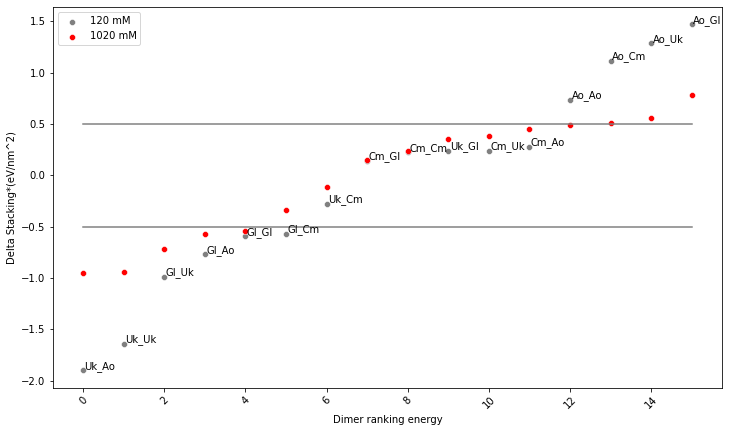

In [15]:
fig, ax = plt.subplots(figsize=(12, 7))
plt.xticks(rotation=45)
plt.ylabel('Delta Stacking*(eV/nm^2)')
plt.xlabel('Dimer ranking energy')

df_120=df_stacking.sort_values(by=["Delta 120"])
df_1020=df_stacking.sort_values(by=["Delta 1020"])
x=[i for i in range(len(df_120['Delta 120']))]
y120=df_120['Delta 120']
y1020=df_1020['Delta 1020']
z120=df_120['stacking baixo']
z1020=df_1020['stacking alto']
chart1 = sns.scatterplot(x=x, y=y120,label='120 mM',color='grey')
chart2 = sns.scatterplot(x=x, y=y1020,label='1020 mM' ,color='r')
n=len(df_stacking['Delta 1020'])
sns.lineplot(x=[i for i in range(n)],y=[-0.5 for i in range(n)],color='grey')
sns.lineplot(x=[i for i in range(n)],y=[0.5 for i in range(n)],color='grey')
for xi, yi, text in zip(x, y120, z120):
    ax.annotate(text,
                xy=(xi, yi), xycoords='data',
                xytext=(1.5, 1.5), textcoords='offset points')
plt.show()
#plt.savefig("emp_120.svg", format="svg")

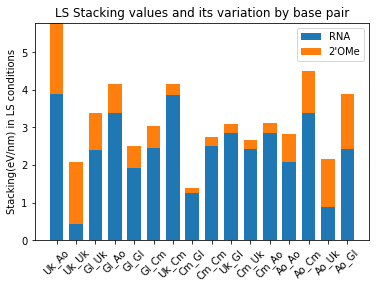

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# data from https://allisonhorst.github.io/palmerpenguins/

species = z120
weight_counts = {
    "RNA": np.array(df_120['can 120']),
    "2'OMe": np.array(df_120['Delta 120']),#'var(%)1020'
}
width = 0.7

fig, ax = plt.subplots()
bottom = np.zeros(16)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count
    #ax.bar_label(p, label_type='center')
plt.xticks(rotation=45)
ax.set_title("LS Stacking values and its variation by base pair")
ax.legend(loc="upper right")
plt.ylabel("Stacking(eV/nm) in LS conditions")
plt.savefig("emp_ls_var.svg", format="svg")
plt.show()

In [ ]:
species = z120
weight_counts = {
    "RNA": np.array(df_120['can 1020']),
    "2'OMe": np.array(df_120['Delta 1020']),#'var(%)1020'
}
width = 0.7

fig, ax = plt.subplots()
bottom = np.zeros(16)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count
plt.xticks(rotation=45)
ax.set_title("HS Stacking values and its variation by base pair")
ax.legend(loc="upper right")
plt.ylabel("Stacking(eV/nm) in HS conditions")
plt.savefig("emp_hs_var.svg", format="svg")
plt.show()

In [ ]:
df_120['var(%)120']=df_120['Delta 120']/df_120['can 120']
df_120['var(%)1020']=df_120['Delta 1020']/df_120['can 1020']

In [ ]:
species = z120
weight_counts = {
    "RNA LS": np.array(df_120['can 120']),
    "RNA HS": np.array(df_120['can 1020']),#'var(%)1020'
}
width = 0.7

fig, ax = plt.subplots()
bottom = np.zeros(16)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count
    #ax.bar_label(p, label_type='center')
plt.xticks(rotation=45)
ax.set_title("RNA Stacking values for LS and HS by base pair")
ax.legend(loc="upper right")
plt.ylabel("Stacking(eV/nm) in conditions")
plt.savefig("emp_ls_hs.svg", format="svg")
plt.show()

In [ ]:
species = z120
weight_counts = {
    "LS": np.array(df_120['Delta 1020']),
    "HS": np.array(df_120['Delta 120']),#'var(%)1020'
}
width = 0.7

fig, ax = plt.subplots()
bottom = np.zeros(16)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count
plt.xticks(rotation=45)
ax.set_title("HS Stacking values and its variation by base pair")
ax.legend(loc="upper right")
plt.ylabel("Stacking(eV/nm) in HS conditions")
plt.savefig("emp_hs_var.svg", format="svg")
plt.show()

##  Grupo das grandes oscilacoes para 2'-o-metil-RNA em 120 mM
### minimo: 
    UA*_AU*,
    UA*_UA*,
    GC*_UA*,
    GC*_AU*,
    GC*_GC*,
    GC*_CG*
### + ou - 0.5
    UA*_CG*,
    CG*_GC*,
    CG*_CG*,
    UA*_GC*,
    CG*_UA*,
    CG*_AU*
### maximo
    AU*_GC*,
    AU*_UA*
    AU*_CG*
    AU*_AU*

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
plt.xticks(rotation=45)
plt.ylabel('Delta Stacking*(eV/nm^2)')
plt.xlabel('Dimer ranking energy')

df_120=df_stacking.sort_values(by=["Delta 120"])
df_1020=df_stacking.sort_values(by=["Delta 1020"])
x=[i for i in range(len(df_120['Delta 120']))]
y120=list(map(abs,df_120['Delta 120']))
y1020=list(map(abs,df_1020['Delta 1020']))
z120=df_120['stacking baixo']
z1020=df_1020['stacking alto']
chart1 = sns.scatterplot(x=x, y=y120,label='120 mM',color='grey')
chart2 = sns.scatterplot(x=x, y=y1020,label='1020 mM' ,color='r')
n=len(df_stacking['Delta 1020'])
sns.lineplot(x=[i for i in range(n)],y=[-0.5 for i in range(n)],color='grey')
sns.lineplot(x=[i for i in range(n)],y=[0.5 for i in range(n)],color='grey')
for xi, yi, text in zip(x, y120, z120):
    ax.annotate(text,
                xy=(xi, yi), xycoords='data',
                xytext=(1.5, 1.5), textcoords='offset points')
plt.show()

### >0.5
    UA*\_AU*,
    UA*\_UA*,
    GC*\_UA*,
    GC*\_AU*,
    GC*\_GC*,
    GC*\_CG*,
    AU*\_AU*,
    AU*\_CG*,
    AU*\_UA*,
    AU*\_GC*
### <0.5
    UA*\_CG*,
    CG*\_GC*,
    CG*\_CG*,
    UA*\_GC*,
    CG*\_UA*,
    CG*\_AU*

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
plt.xticks(rotation=45)
plt.ylabel('Delta Stacking*(eV/nm^2)')
plt.xlabel('Dimer ranking energy')

df_120=df_stacking.sort_values(by=["Delta 120"])
df_1020=df_stacking.sort_values(by=["Delta 1020"])
x=[i for i in range(len(df_120['Delta 120']))]
y120=df_120['Delta 120']
y1020=df_1020['Delta 1020']
z120=df_120['stacking baixo']
z1020=df_1020['stacking alto']
n=len(df_stacking['Delta 1020'])
sns.lineplot(x=[i for i in range(n)],y=[-0.5 for i in range(n)],color='grey')
sns.lineplot(x=[i for i in range(n)],y=[0.5 for i in range(n)],color='grey')
chart1 = sns.scatterplot(x=x, y=y120,label='120 mM',color='grey')
chart2 = sns.scatterplot(x=x, y=y1020,label='1020 mM' ,color='r')
for xi, yi, text in zip(x, y1020, z1020):
    ax.annotate(text,
                xy=(xi, yi), xycoords='data',
                xytext=(1.5, 1.5), textcoords='offset points')

plt.show()
plt.savefig("emp_1020.svg", format="svg")

##  Grupo das grandes oscilacoes para 2'-o-metil-RNA em 1020 mM
### minimo: 
    GC*_CG*
    AU*_AU*
    CG*_CG*
    GC*_GC*
### + ou - 0.5
    CG*_GC*
    AU*_UA*
    GC*_UA*
    AU*_GC*
    CG*_UA*
    GC*_AU*
    UA*_GC*
    CG*_AU*
### maximo
    AU*_GC*
    UA*_CG*
    UA*_AU*

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
plt.xticks(rotation=45)
plt.ylabel('Delta Stacking*(eV/nm^2)')
plt.xlabel('Dimer ranking energy')

df_120=df_stacking.sort_values(by=["Delta 120"])
df_1020=df_stacking.sort_values(by=["Delta 1020"])
x=[i for i in range(len(df_120['Delta 120']))]
y120=list(map(abs,df_120['Delta 120']))
y1020=list(map(abs,df_1020['Delta 1020']))
z120=df_120['stacking baixo']
z1020=df_1020['stacking alto']
n=len(df_stacking['Delta 1020'])
#sns.lineplot(x=[i for i in range(n)],y=[-0.5 for i in range(n)],color='grey')
sns.lineplot(x=[i for i in range(n)],y=[0.5 for i in range(n)],color='grey')
chart1 = sns.scatterplot(x=x, y=y120,label='120 mM',color='grey')
chart2 = sns.scatterplot(x=x, y=y1020,label='1020 mM' ,color='r')
for xi, yi, text in zip(x, y1020, z1020):
    ax.annotate(text,
                xy=(xi, yi), xycoords='data',
                xytext=(1.5, 1.5), textcoords='offset points')

plt.show()

## Baixo sal
### > 0.5
    GC*\_CG*,
    UA*\_UA*,
    AU*\_AU*,
    CG*\_CG*,
    GC*\_GC*,
    AU*\_GC*,
    UA*\_CG*,
    UA*\_AU*
### < 0.5
    CG*\_GC*,
    AU*\_UA*,
    GC*\_UA*,
    AU*\_CG*,
    CG*\_UA*,
    GC*\_AU*,
    UA*\_GC*
## Alto sal
### >0.5
    UA*\_AU*,
    UA*\_UA*,
    GC*\_UA*,
    GC*\_AU*,
    GC*\_GC*,
    GC*\_CG*,
    AU*\_AU*,
    AU*\_CG*,
    AU*\_UA*,
    AU*\_GC*
### <0.5
    UA*\_CG*,
    CG*\_GC*,
    CG*\_CG*,
    UA*\_GC*,
    CG*\_UA*,
    CG*\_AU*

In [ ]:
nomes_1020=df_1020['stacking alto']
nomes_120=df_120['stacking baixo']

In [ ]:
nomes_120.values

In [ ]:
nomes_1020.values

In [ ]:
#criar o df alto e baixo separados para conseguir fazer graficos
df_stca=pd.DataFrame({
    'stacking':parametro_emp_alto,
    'can 1020':stacking_alto_ref,
    '1020':stacking_alto
})

df_stcb=pd.DataFrame({
    'stacking':parametro_emp_baixo,
    'can 120':stacking_baixo_ref,
    '120':stacking_baixo
})

In [ ]:
plt.figure(figsize=(8, 4))
plt.xticks(rotation=45)
plt.ylabel('Empilhamento(un)')
plt.xlabel('Parametro')
chart = sns.scatterplot(x=df_stacking['stacking baixo'], y=df_stacking['120'],label='baixo', color='g')
chart = sns.scatterplot(x=df_stacking['stacking baixo'], y=df_stacking['can 120'],label='baixo ref',color='b')

chart = sns.scatterplot(x=df_stacking['stacking alto'], y=df_stacking['1020'],label='alto',marker='+', color='g')
chart = sns.scatterplot(x=df_stacking['stacking alto'], y=df_stacking['can 1020'],label='alto ref',marker='+',color='b')
#chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
#plt.savefig("empilhamento_2ome_alto+baixo.svg", format="svg")
plt.show()
'''ta errado!'''

In [ ]:
df_stacking.sort_values(by=['can 1020'], inplace=True)
plt.figure(figsize=(8, 4))
plt.title('Stacking parameter at high salt(1020 mM NaCl)')
plt.xticks(rotation=45)
plt.ylabel('Stacking(eV/nm^2)')
plt.xlabel('Dimer')
#chart = sns.scatterplot(x=df_stacking['stacking'], y=df_stacking['120'],label='baixo', color='g')
#chart = sns.scatterplot(x=df_stacking['stacking'], y=df_stacking['can 120'],label='baixo ref',color='b')

chart = sns.scatterplot(x=df_stacking['stacking alto'], y=df_stacking['1020'],label='optimized' ,color='r')
chart = sns.scatterplot(x=df_stacking['stacking alto'], y=df_stacking['can 1020'],label='reference',color='grey')
#chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
#plt.savefig("empilhamento_2ome_alto.svg", format="svg")
plt.show()

In [ ]:
df_stacking.columns=['stacking HS', 'ref HS', 'HS', 'stacking LS', 'ref LS', 'LS',
       '$\Delta$ LS', '$\Delta$ HS']

In [ ]:
df_stacking.sort_values(by=['$\Delta$ LS'], inplace=True)
plt.figure(figsize=(8, 4))
plt.title('Stacking parameter variation at high salt(1020 mM NaCl)')
plt.xticks(rotation=45)
plt.ylabel('$\Delta$ Stacking(eV/nm^2)')
plt.xlabel('Dimer')
#chart = sns.scatterplot(x=df_stacking['stacking'], y=df_stacking['120'],label='baixo', color='g')
#chart = sns.scatterplot(x=df_stacking['stacking'], y=df_stacking['can 120'],label='baixo ref',color='b')

chart = sns.scatterplot(x=df_stacking['stacking LS'], y=df_stacking['$\Delta$ LS'],label='120 mM' ,color='r')
chart = sns.scatterplot(x=df_stacking['stacking LS'], y=df_stacking['$\Delta$ HS'],label='1020 mM',color='grey')
#chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
#plt.savefig("empilhamento_2ome_alto.svg", format="svg")
plt.show()

In [ ]:
nomes=['CG*_GC*','AU*_AU*','UA*_UA*','AU*_UA*','CG*_AU*','UA*_GC*','AU*_GC*','CG*_UA*','UA*_AU*','CG*_CG*','GC*_GC*','AU*_CG*','GC*_UA*','GC*_AU*','UA*_CG*','GC*_CG*']
df_stacking.sort_values(by=['120'],inplace=True)

plt.figure(figsize=(8, 4))
plt.title('Stacking parameter at low salt(120 mM NaCl)')
plt.xticks(rotation=45)
plt.ylabel('Stacking(eV/nm^2)')
plt.xlabel('Dimer')
chart = sns.scatterplot(x=df_stacking['stacking baixo'], y=df_stacking['120'],label='optimized', color='r')
chart = sns.scatterplot(x=df_stacking['stacking baixo'], y=df_stacking['can 120'],label='reference',color='grey')

#chart = sns.scatterplot(x=df_stacking['stacking'], y=df_stacking['1020'],label='alto',marker='+', color='g')
#chart = sns.scatterplot(x=df_stacking['stacking'], y=df_stacking['can 1020'],label='alto ref',marker='+',color='b')
#chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
#plt.savefig("empilhamento_2ome_baixo2.svg", format="svg")
plt.show()

In [ ]:
'''df_stacking.sort_values(by=['Delta 1020'], inplace=True)
plt.figure(figsize=(8, 4))
plt.xticks(rotation=45)
#chart = sns.scatterplot(x=df_stacking['stacking'], y=df_stacking['Delta 120'],label='120 mM' ,color='r')
chart1 = sns.scatterplot(x=df_stacking['stacking'], y=df_stacking['Delta 1020'],label='1020 mM',color='grey')
plt.show()
df_stacking.sort_values(by=['Delta 120'], inplace=True)
plt.figure(figsize=(8, 4))
plt.xticks(rotation=45)
chart2 = sns.scatterplot(x=df_stacking['stacking'], y=df_stacking['Delta 120'],label='120 mM' ,color='r')
#chart = sns.scatterplot(x=df_stacking['stacking'], y=df_stacking['Delta 1020'],label='1020 mM',color='grey')
plt.show()
'''
plt.figure(figsize=(8, 4))
plt.xticks(rotation=45)
plt.ylabel('Delta Stacking*(eV/nm^2)')
plt.xlabel('Dimer rank energy')
df_stacking.sort_values(by=['Delta 120'], inplace=True)
chart1 = sns.scatterplot(x=[i for i in range(len(df_stacking['Delta 120']))], y=df_stacking['Delta 120'],label='120 mM',color='grey')
df_stacking.sort_values(by=['Delta 1020'], inplace=True)
chart2 = sns.scatterplot(x=[i for i in range(len(df_stacking['Delta 1020']))], y=df_stacking['Delta 1020'],label='1020 mM' ,color='r')
#chart = sns.scatterplot(x=df_stacking['stacking'], y=df_stacking['Delta 1020'],label='1020 mM',color='grey')
plt.show()

In [ ]:
'''fig, ax=plt.subplots()
plt.figure(figsize=(8, 4))
plt.xticks(rotation=45)
plt.ylabel('Delta Stacking*(eV/nm^2)')
plt.xlabel('Dimer rank energy')
df_stacking.sort_values(by=['Delta 120'], inplace=True)
x=[i for i in range(len(df_stacking['Delta 120']))]
y=df_stacking['Delta 120']
chart1 = sns.scatterplot(x=x, y=y,label='120 mM',color='grey')
df_stacking.sort_values(by=['Delta 1020'], inplace=True)
#chart2 = sns.scatterplot(x=[i for i in range(len(df_stacking['Delta 1020']))], y=df_stacking['Delta 1020'],label='1020 mM' ,color='r')
#chart = sns.scatterplot(x=df_stacking['stacking'], y=df_stacking['Delta 1020'],label='1020 mM',color='grey')
z= df_stacking['stacking']
ax=fig.add_subplot(111)
for i, txt in enumerate(z):
    ax.text(x[i],y[i],txt)
plt.show()'''

In [ ]:
import matplotlib.patches as patches
'''#fig, ax = plt.subplots()
plt.figure(figsize=(8, 4))
plt.xticks(rotation=45)
plt.ylabel('Delta Stacking*(eV/nm^2)')
plt.xlabel('Dimer ranking energy')
media120=df_stacking['Delta 120'].mean()
media1020=df_stacking['Delta 1020'].mean()
n=len(df_stacking['Delta 1020'])
sns.lineplot(x=[i for i in range(n)],y=[media120 for i in range(n)],color='grey')
sns.lineplot(x=[i for i in range(n)],y=[media1020 for i in range(n)],color='r')
sns.lineplot(x=[i for i in range(n)],y=[0.425 for i in range(n)],color='r')
sns.lineplot(x=[i for i in range(n)],y=[-0.5 for i in range(n)],color='r')
df_stacking.sort_values(by=['Delta 120'], inplace=True)
chart1 = sns.scatterplot(x=[i for i in range(len(df_stacking['Delta 120']))], y=df_stacking['Delta 120'],label='120 mM',color='grey')
df_stacking.sort_values(by=['Delta 1020'], inplace=True)
chart2 = sns.scatterplot(x=[i for i in range(len(df_stacking['Delta 1020']))], y=df_stacking['Delta 1020'],label='1020 mM' ,color='r')
#plt.savefig("delta_empil_2ome.svg", format="svg")'''


In [ ]:
import matplotlib.patches as patches
import numpy as np
'''#fig, ax = plt.subplots()
plt.figure(figsize=(8, 4))
plt.xticks(rotation=45)
plt.ylabel('Ranking energy')
plt.xlabel('Delta Stacking*(eV/nm^2)')
media120=df_stacking['Delta 120'].mean()
media1020=df_stacking['Delta 1020'].mean()
n=len(df_stacking['Delta 1020'])
sns.lineplot(x=[i for i in range(n)],y=[media120 for i in range(n)],color='grey')
sns.lineplot(x=[i for i in range(n)],y=[media1020 for i in range(n)],color='r')

df_stacking.sort_values(by=['Delta 120'], inplace=True)
chart1 = sns.scatterplot(x=df_stacking['Delta 120'],
                         y=[i for i in range(len(df_stacking['Delta 120']))],label='can-opt  120 mM',color='grey')
df_stacking.sort_values(by=['Delta 1020'], inplace=True)
chart2 = sns.scatterplot(x=df_stacking['Delta 1020']*(np.log(1020)-np.log(120)), 
                         y=[i for i in range(len(df_stacking['Delta 1020']))],
                         label='can-opt 1020 mM' ,color='r')'''
#plt.savefig("delta_empil_2ome.svg", format="svg")


In [ ]:
#estudando o coeficiente de correlacao em funcao do termo multiplicativo


In [ ]:
#chart3=sns.jointplot(x=df_stacking['Delta 1020'],y=df_stacking['Delta 120']/2)

In [ ]:
import numpy as np
np.log(1020)-np.log(120)

In [ ]:
'''sns.displot(data=df_stacking, x="Delta 1020", kde=True)
#chart1a=sns.displot(data=df_stacking, x="can 1020", kind="kde")
sns.displot(data=df_stacking, x="Delta 120", kde=True)
#chart2a=sns.displot(data=df_stacking, x="can 120", kind="kde")
plt.show()'''

In [ ]:
z= list(df_stacking["stacking"])

In [ ]:
'''df_stacking.sort_values(by=['stacking'], inplace=True)
df_stacking['stacking']=['AU*_AU*', 'AU*_CG*', 'AU*_GC*', 'AU*_UA*', 'CG*_AU*', 'CG*_CG*', 'CG*_GC*',
       'CG*_UA*', 'GC*_AU*', 'GC*_CG*', 'GC*_GC*', 'GC*_UA*', 'UA*_AU*', 'UA*_CG*',
       'UA*_GC*', 'UA*_UA*']
'''
df_stacking

In [ ]:
df_stacking['stacking baixo']=['UA*_UA*', 'CG*_GC*', 'GC*_GC*', 'AU*_UA*', 'GC*_UA*', 'GC*_CG*', 'CG*_UA*',
       'CG*_CG*', 'AU*_AU*', 'UA*_GC*', 'CG*_AU*', 'GC*_AU*', 'UA*_CG*', 'UA*_AU*',
       'AU*_GC*', 'AU*_CG*']
df_stacking['stacking alto']=['UA*_UA*', 'CG*_GC*', 'GC*_GC*', 'AU*_UA*', 'GC*_UA*', 'GC*_CG*', 'CG*_UA*',
       'CG*_CG*', 'AU*_AU*', 'UA*_GC*', 'CG*_AU*', 'GC*_AU*', 'UA*_CG*', 'UA*_AU*',
       'AU*_GC*', 'AU*_CG*']

In [ ]:
'''fig, ax=plt.subplots()
df_stacking.sort_values(by=["Delta 120"], inplace=True)
z=df_stacking['stacking']
x=df_stacking["120"]
y=df_stacking["1020"]
ax=fig.add_subplot(111)
#plt.figure(figsize=(8, 4))
sns.scatterplot(data=df_stacking, x="Delta 120", y="1020")
for i, txt in enumerate(z):
    ax.text(x[i],y[i],txt)
plt.show()'''
'''ta errado'''

# A correlacao parece aumentar com um fator multipicativo
## Eu decidi verificar o que aconte se eu colocar um parametro que leve em conta as diferencas entre as concentracoes de sal e coloque um valor proximo a 2 que, pode ser por coincidencia, eh proximo de ln(1020)-ln(120), a ln(1020/120)

In [ ]:
'''fig, ax=plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(12)
df_stacking.sort_values(by=['Delta 1020'], inplace=True)
x=df_stacking["120"]
y=df_stacking["1020"]
chart1=sns.scatterplot(data=df_stacking, x="can 1020", y=df_stacking["1020"])
chart2=sns.regplot(data=df_stacking, x="can 1020", y=df_stacking["1020"])
#*(np.log(1020)-np.log(120))
#chart3=sns.scatterplot(data=df_stacking, x="can 1020", y=df_stacking["1020"],color='r')
#chart4=sns.regplot(data=df_stacking, x="can 1020", y=df_stacking["1020"],color='r')

#chart5=sns.scatterplot(data=df_stacking, x="120", y=df_stacking["can 1020"],color='r')
#chart6=sns.regplot(data=df_stacking, x="120", y=df_stacking["can 1020"],color='r')

plt.xlabel('Stacking for 120 mM')
plt.ylabel('Stacking for 1020 mM')
for i, txt in enumerate(z):
    ax.text(x[i],y[i]*(np.log(1020)-np.log(120))-0.07,txt)
#plt.savefig("corr_empil_2ome.svg", format="svg")
plt.show()'''
'''ta errado'''

In [ ]:
'''a=np.corrcoef(df_stacking['can 1020'],df_stacking['can 120'])
b=np.corrcoef(df_stacking['can 120'],df_stacking['120'])
c=np.corrcoef(df_stacking['can 1020'],df_stacking['1020'])
d=np.corrcoef(df_stacking['120'],df_stacking['1020'])
print(f"Coef. de correlacao entre canonicos= {a[0][1]},\n entre canonico e tratado baixo sal= {b[0][1]}\n entre canonico e tratado alto sal={c[0][1]} e, \n tratados alto e baixo sal= {d[0][1]}")
'''
'''ta errado'''

## A correlacao entre os canonicos para alto e baixo sal, r= 0.638, mostra que os parametros que melhor descrevem o sistema nos dois casos sao diferentes.

## O canonico e o otimizado para baixo sal apresentam baixa correlacao, r=0.614, o que significa que para descrever a alteracao 2'-o-methylRNA foi necessario encontrar um conjunto de parametros diferentes da referencia.

##  Para alto sal, a correlacao melhora, r= 0.793, o que mostra uma conformidade entre os conjuntos canonico e da alteracao 2'-o-methylRNA, o que pode indicar que o efeito do sal na estabilidade da fita se assemelha ao efeito da alteracao na ribose  2'-o-methylRNA.

## Um dado que corrobora com esta discussao eh a correlacao entre os conjuntos tratados em baixo e alto sal, r= 0.786, muito proximo ao encontrado para o canonico e otimizado em alto sal.

    Na tabela x sao apresentados os resultados das correlacoes entre os conjuntos utilizados, canonico e otimizados a baixo e alto sal. Foram analisadas todas as possiveis correlacoes, conforme mostra a tabela. 
    
    O efeito da concentracao de sal na estabilidade do sistema leva a conjuntos de parametros de empilhamento diferentes para diferentes concentracoes, com baixa correlacao encontrada entre os conjuntos de parametros de referencia para baixo e alto sal, r=0.638,(dados utilizados do artigo de referencia que eu vou citar aqui). Quando esta comparacao eh feita em funcao da concentracao de sal, ou seja, compara-se os parametros de referencia para baixo sal com o parametro otimizado tambem para baixo sal, observa-se que o efeito inserido pela alteracao da ribose, 2'-o-methylRNA, tambem nao se correlaciona bem com os parametros de referencia, com a correlacao encontradao r= 0.614. A mesma analise para o conjunto em alto sal, 1020 mM de NA+, fornece uma correlacao melhor, r= 0.793, mostrando que o conjunto de parametros de referencia em alto sal e da modificacao 2'-o-methylRNA na mesma concentracao salina diferem menos que tais valores em baixo sal. Por ultimo, o conjunto de dados otimizados para 2'-o-methylRNA em alto e baixo sal foram analisados e sua correlacao foi de r= 0.786, resultado muito semelhante ao encontrado para o alto sal. 
    Estes resultados indicam efeitos semelhantes para a alteracao 2'-o-methylRNA e concentracao salina.

In [ ]:
df_stacking.columns=['NN Parameter', 'ref HS', 'HS', 'NN Parameter low', 'ref LS', 'LS']
df_stacking

In [ ]:
fig, ax=plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(12)
sns.heatmap(df_stacking.corr(), cmap="YlGnBu", annot=True) 
plt.savefig("corr_map_2ome.svg", format="svg")
plt.show()
'''ta errado!!'''

In [ ]:
fig, ax=plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)
df_stacking.sort_values(by=['stacking'], inplace=True)
x=df_stacking["120"]
y=df_stacking["1020"]
chart1=sns.distplot(df_stacking["Delta 120"], label='120', bins=6)
chart2=sns.distplot(df_stacking["Delta 1020"], color='orange', label='1020', bins=6)
plt.xlabel('Stacking for 120 mM')
plt.ylabel('Stacking for 1020 mM')
plt.show()

In [ ]:
morse=['AU*','CG*','GC*','UA*']
df_morse['morse']=morse
#nome=df_morse_baixo['nome'].values
plt.figure(figsize=(3, 9))
plt.xticks(rotation=45)
plt.ylabel('Morse(meV)')
plt.xlabel('Dimer')
plt.title('Morse parameter at low and high salt')
chart = sns.scatterplot(x=df_morse['morse'], y=df_morse['120'],label='ls',color='r')
chart = sns.scatterplot(x=df_morse['morse'], y=df_morse['can 120'],label='ls ref',color='grey')

chart = sns.scatterplot(x=df_morse['morse'], y=df_morse['can 1020'],label='hs ref',marker="+",color='grey' )
chart = sns.scatterplot(x=df_morse['morse'], y=df_morse['1020'],label='hs',marker="+",color='r')
#chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.ylim(0, 90)
#plt.savefig("morse_2ome_alto+baixo.svg", format="svg")

plt.show()


## 
    Os valores de Morse para baixo sal se mantiveram praticamente inalterados, ja para para alto sal, os parametros relativos ao par CG: CG* e C*G, aumentaram se comparados com a referencia, enquanto que, os parametros relacionados ao par AU: AU* e A*U, diminuiram.
    O sistema analisado eh composto de fitas simples 2'-o-metilribose/rna, onde as bases marcadas com * sao 2'-o-metilribose.

    120 mM
    Base-pair set : AU*=90 CG*=89 GC*=163 UA*=147
    NeighbU*urs set : AU*_AU*=17 AU*_CG*=20 AU*_GC*=36 AU*_UA*=17 CG*_AU*=18 CG*_CG*=23 CG*_GC*=29 CG*_UA*=19 GC*_AU*=26 GC*_CG*=30 GC*_GC*=42 GC*_UA*=65 UA*_AU*=29 UA*_CG*=16 UA*_GC*=56 UA*_UA*=46

    1020 mM

    Base-pair set : AU*=49 CG*=34 GC*=89 UA*=70
    NeighbU*urs set : AU*_AU*=7 AU*_CG*=5 AU*_GC*=30 AU*_UA*=7 CG*_AU*=8 CG*_CG*=13 CG*_GC*=10 CG*_UA*=3 GC*_AU*=18 GC*_CG*=14 GC*_GC*=18 GC*_UA*=39 UA*_AU*=16 UA*_CG*=2 UA*_GC*=31 UA*_UA*=2

In [ ]:
df_stacking.sort_values(by=["Delta 1020"], inplace=True)
df_stacking.head()

In [ ]:
df_stacking.sort_values(by=["Delta 120"], inplace=True)
df_stacking

In [ ]:
'''df_stacking['sqrt delta 120']=[np.sqrt(i*i) for i in df_stacking["Delta 120"]]
df_stacking['sqrt delta 1020']=[np.sqrt(i*i) for i in df_stacking["Delta 1020"]]
sns.pairplot(df_stacking)'''

In [ ]:
fig, ax=plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(12)
sns.heatmap(df_stacking.corr(), cmap="YlGnBu", annot=True) 
plt.show()

In [ ]:
df_stacking['sqrt delta 120']=list(map(abs,df_stacking['Delta 120']))
df_stacking['sqrt delta 1020']=list(map(abs,df_stacking['Delta 1020']))

In [ ]:
df_stacking.sort_values(by=["sqrt delta 120"], inplace=True)
df_stacking

In [ ]:
df_stacking.sort_values(by=["sqrt delta 1020"], inplace=True)
df_stacking

In [ ]:
df_stacking.corr()

In [ ]:
fig, ax=plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(12)
sns.heatmap(df_stacking.corr(), cmap="YlGnBu", annot=True) 
plt.show()

In [ ]:
sns.pairplot(data=df_stacking)

In [ ]:
df_stacking.corr(method='spearman')

In [ ]:
fig, ax=plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(12)
corr=df_stacking.corr(method='spearman')
sns.heatmap(corr,cmap="YlGnBu", annot = True)
#plt.savefig("spearman_corr.svg", format="svg")
plt.show()

In [ ]:
fig, ax=plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(12)
corr=df_stacking.corr(method='kendall')
sns.heatmap(corr,cmap="YlGnBu", annot = True)
#plt.savefig("kendall_corr.svg", format="svg")
plt.show()

In [ ]:
df=df_stacking[['stacking alto', 'can 1020', '1020', 'stacking baixo','can 120', '120', 'Delta 120',
       'Delta 1020']]
fig, ax=plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(12)
corr=df.corr(method='kendall')
sns.heatmap(corr,cmap="YlGnBu", annot = True)
#plt.savefig("kendall_corr1.svg", format="svg")
plt.show()

In [ ]:
fig, ax=plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(12)
corr=df.corr(method='spearman')
sns.heatmap(corr,cmap="YlGnBu", annot = True)
#plt.savefig("spearman_corr1.svg", format="svg")
plt.show()

In [ ]:
df_stacking

In [ ]:
plt.figure(figsize=(8, 4))
plt.xticks(rotation=45)
plt.ylabel('Delta Stacking*(eV/nm^2)')
plt.xlabel('Dimer ranking energy')
media120=df_stacking['Delta 120'].mean()
media1020=df_stacking['Delta 1020'].mean()
n=len(df_stacking['Delta 1020'])
#sns.lineplot(x=[i for i in range(n)],y=[media120 for i in range(n)],color='grey')
#sns.lineplot(x=[i for i in range(n)],y=[media1020 for i in range(n)],color='r')
#sns.lineplot(x=[i for i in range(n)],y=[0.425 for i in range(n)],color='r')
#sns.lineplot(x=[i for i in range(n)],y=[-0.5 for i in range(n)],color='r')
df_stacking.sort_values(by=['Delta 120'], inplace=True)
chart1 = sns.scatterplot(x=[i for i in range(len(df_stacking['Delta 120']))], y=df_stacking['Delta 120'],label='120 mM',color='grey')
df_stacking.sort_values(by=['Delta 1020'], inplace=True)
chart2 = sns.scatterplot(x=[i for i in range(len(df_stacking['Delta 1020']))], y=df_stacking['Delta 1020'],label='1020 mM' ,color='r')
#plt.savefig("delta_empil_2ome.svg", format="svg")


In [ ]:
#Variacao em alto e baixo sal

df_stacking['var']=df_stacking['1020']-df_stacking['120']
df_stacking.sort_values(by=['var'], inplace=True)
plt.figure(figsize=(8, 4))
plt.xticks(rotation=45)
plt.title('The variation of stacking parameter between LS and HS groups')
plt.ylabel('Stacking variation')
plt.xlabel('Dimer')
chart1 = sns.scatterplot(x=df_stacking['stacking alto'], y=df_stacking['var'],color='red')
#plt.savefig('var_lshs.svg',format="svg")

In [ ]:

df_stacking['var']=df_stacking['1020']-df_stacking['120']
df_stacking.sort_values(by=['var'], inplace=True)
plt.figure(figsize=(8, 4))
plt.xticks(rotation=45)
plt.title('The variation of stacking parameter between LS and HS groups')
plt.ylabel('Stacking variation')
plt.xlabel('Dimer')
#sns.lineplot(x=df_stacking['stacking'],y=[0.5 for i in range(len(df_stacking['var']))],color='grey')
chart1 = sns.scatterplot(x=df_stacking['stacking alto'],y=list(map(abs,df_stacking['var'])) ,color='red',label='absolute variation')
chart2 = sns.scatterplot(x=df_stacking['stacking baixo'], y=df_stacking['var'],color='grey', label='variation')
#plt.savefig('var_lshs.svg',format="svg")

In [ ]:
plt.figure(figsize=(8, 4))
plt.xticks(rotation=45)
plt.ylabel('Delta Stacking*(eV/nm^2)')
plt.xlabel('Dimer ranking energy')
media120=df_stacking['Delta 120'].mean()
media1020=df_stacking['Delta 1020'].mean()
n=len(df_stacking['Delta 1020'])
#sns.lineplot(x=[i for i in range(n)],y=[media120 for i in range(n)],color='grey')
#sns.lineplot(x=[i for i in range(n)],y=[media1020 for i in range(n)],color='r')
#sns.lineplot(x=[i for i in range(n)],y=[0.425 for i in range(n)],color='r')
#sns.lineplot(x=[i for i in range(n)],y=[-0.5 for i in range(n)],color='r')
df_stacking.sort_values(by=['Delta 120'], inplace=True)
chart1 = sns.scatterplot(x=[i for i in range(len(df_stacking['Delta 120']))], y=list(map(abs,df_stacking['Delta 120'])),label='120 mM',color='grey')
df_stacking.sort_values(by=['Delta 1020'], inplace=True)
chart2 = sns.scatterplot(x=[i for i in range(len(df_stacking['Delta 1020']))],y=list(map(abs,df_stacking['Delta 1020'])),label='1020 mM' ,color='r')
#plt.savefig("delta_empil_2ome.svg", format="svg")

In [ ]:
def op(delta,valor):
    return delta/valor
plt.figure(figsize=(8, 4))
plt.xticks(rotation=45)
df_stacking['var_perc 120']=list(map(op,list(map(abs,df_stacking['Delta 120'])),df_stacking['can 120']))
df_stacking.sort_values(by=['var_perc 120'], inplace=True)
sns.scatterplot(x=df_stacking['stacking baixo'],y=df_stacking['var_perc 120']*100,label='120 mM', color='grey')
#sns.scatterplot(x=df_stacking['stacking'],y=df_stacking['var_perc 1020']*100,label='1020 mM', color='red')
#plt.savefig('var_perc_120.svg',format="svg")

In [ ]:
plt.figure(figsize=(8, 4))
plt.xticks(rotation=45)
df_stacking['var_perc 1020']=list(map(op,list(map(abs,df_stacking['Delta 1020'])),df_stacking['can 1020']))
df_stacking.sort_values(by=['var_perc 1020'], inplace=True)
#sns.scatterplot(x=df_stacking['stacking'],y=df_stacking['var_perc 120'],label='120 mM', color='grey')
sns.scatterplot(x=df_stacking['stacking alto'],y=df_stacking['var_perc 1020']*100,label='1020 mM', color='red')
#plt.savefig('var_perc_1020.svg',format="svg")

In [ ]:
def var_op(ls,hs):
    return abs(hs-ls)/ls
df_stacking['var_per_salt']=list(map(var_op,df_stacking['120'],df_stacking['1020']))
df_stacking.sort_values(by=['var_per_salt'], inplace=True)
plt.figure(figsize=(8, 4))
plt.xticks(rotation=45)
#df_stacking['var_perc 1020']=list(map(op,list(map(abs,df_stacking['Delta 1020'])),df_stacking['can 1020']))
#df_stacking.sort_values(by=['var_perc 1020'], inplace=True)
#sns.scatterplot(x=df_stacking['stacking'],y=df_stacking['var_perc 120'],label='120 mM', color='grey')
#sns.scatterplot(x=df_stacking['stacking'],y=df_stacking['var_perc 1020'],label='1020 mM', color='red')
sns.scatterplot(x=df_stacking['stacking baixo'],y=df_stacking['var_per_salt']*100,label='120 to 1020 mM', color='blue')
#plt.savefig('var_perc_120to1020.svg',format="svg")

### pirimidinas: U, T, C
### purinas: A, G
    purinas seguidas de purinas-homo:
    AU*_AU*: pouca variacao
    CG*_CG*: pouca variacao
    UA*_UA*: variacao media
    GC*_GC*: pouca variacao
    purinas seguidas de purinas/pirimidinas seguidas de pirimidinas-hetero:
    UA*_CG*: pouca variacao
    AU*_GC*: pouca variacao
    CG*_UA*: pouca variacao
    GC*_AU*: pouca variacao
    purinas seguidas de pirimidinas
    UA*_GC*:
    AU*_CG*:
    CG*_AU*:
    GC*_UA*:
    AU*_UA*:
    UA*_AU*:
    CG*_GC*:
    GC*_CG*:

In [ ]:
sns.scatterplot(x=df_stacking['var_perc 120'],y=df_stacking['var_perc 1020'],label='1020 mM', color='red')

In [ ]:
fig, ax=plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(12)
corr=df_stacking.corr(method='spearman')
sns.heatmap(corr,cmap="YlGnBu", annot = True)
#plt.savefig("spearman_corr1.svg", format="svg")
plt.show()

In [ ]:
df_stacking.sort_values(by=['var_perc 120'], inplace=True)
df_stacking['stacking baixo'].values

'''
'UA*_CG*', 'UA*_GC*', 'CG*_CG*', 'CG*_AU*', 'CG*_UA*', 'CG*_GC*',
       'GC*_AU*', 'GC*_CG*', 'GC*_GC*', 'GC*_UA*', 'UA*_AU*', 'AU*_CG*',
       'AU*_AU*', 'AU*_GC*', 'UA*_UA*', 'AU*_UA*'
'''
df_stacking[['stacking baixo','var_perc 120','var_perc 1020']]

In [ ]:
df_stacking.sort_values(by=['var_perc 1020'], inplace=True)
#df_stacking['stacking'].values
'''
''GC*_UA*', 'AU*_UA*', 'AU*_CG*', 'GC*_AU*', 'CG*_UA*', 'UA*_CG*',
       'GC*_GC*', 'UA*_GC*', 'CG*_CG*', 'CG*_AU*', 'AU*_GC*', 'CG*_GC*',
       'GC*_CG*', 'UA*_AU*', 'AU*_AU*', 'UA*_UA*'
'''
df_stacking[['stacking alto','var_perc 1020']]

In [ ]:
import seaborn as sns
df_stacking['stacking baixo'].values

In [ ]:
sns.pairplot(data=df_stacking)

In [ ]:
df_stacking.columns

In [ ]:
df_stacking['var_perc 120']=df_stacking['var_perc 120']*100
df_stacking['var_perc 1020']=df_stacking['var_perc 1020']*100
df_stacking['var_per_salt']=df_stacking['var_per_salt']*100

In [ ]:
df_stacking

In [ ]:
stat_120='Ao_Ao=17 Ao_Cm=20 Ao_Gl=34 Ao_Uk=14 Cm_Ao=17 Cm_Cm=15 Cm_Gl=29 Cm_Uk=17 Gl_Ao=24 Gl_Cm=22 Gl_Gl=41 Gl_Uk=61 Uk_Ao=25 Uk_Cm=14 Uk_Gl=55 Uk_Uk=14'.split()

In [ ]:
stat_1020='Ao_Ao=7 Ao_Cm=5 Ao_Gl=28 Ao_Uk=5 Cm_Ao=8 Cm_Cm=9 Cm_Gl=10 Cm_Uk=2 Gl_Ao=17 Gl_Cm=14 Gl_Gl=18 Gl_Uk=37 Uk_Ao=14 Uk_Cm=1 Uk_Gl=30 Uk_Uk=1'.split()

In [ ]:
nomes=[]
freq_120=[]
freq_1020=[]
for i,j in zip(stat_120,stat_1020):
    nomes.append(i.split("=")[0])
    freq_120.append(i.split("=")[1])
    freq_1020.append(j.split("=")[1])
df=pd.DataFrame({'parametro':nomes,
                 'freq 120':freq_120,
                'freq 1020':freq_1020})
df

# Estudando a composicao da base de dados

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.barplot(data=df,x="nn", y="count")#, color="blue"
plt.title("Titulo")
plt.xlabel("Dimeros terminais")
plt.ylabel("Frequencia(Contagem)")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.barplot(data=dfi,x="nn", y="count")#, color="blue"
plt.title("Titulo")
plt.xlabel("Dimeros internos")
plt.ylabel("Frequencia(Contagem)")